In [21]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [22]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [46]:
# Read and clean dataset
df =  pd.read_csv('diagnostic.csv', header=0)
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [47]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### As we can see that the last column Unnamed: 32 has all NaN value so we will drop this column.

In [48]:
df = df.drop(["id"], axis = 1)
df = df.drop(["Unnamed: 32"], axis = 1)

In [49]:
# Find unique values in 'diagnosis' column:-

df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [50]:
# Replace 'M' with 1 and 'B' with 0 in column 'diagnosis':-

df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [51]:
df.diagnosis.unique()

array([1, 0], dtype=int64)

0    357
1    212
Name: diagnosis, dtype: int64


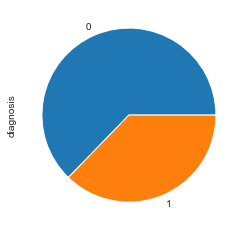

In [52]:
# Diagnosis Pie chart:-

print(df.diagnosis.value_counts())
df.diagnosis.value_counts().plot.pie();

<AxesSubplot:>

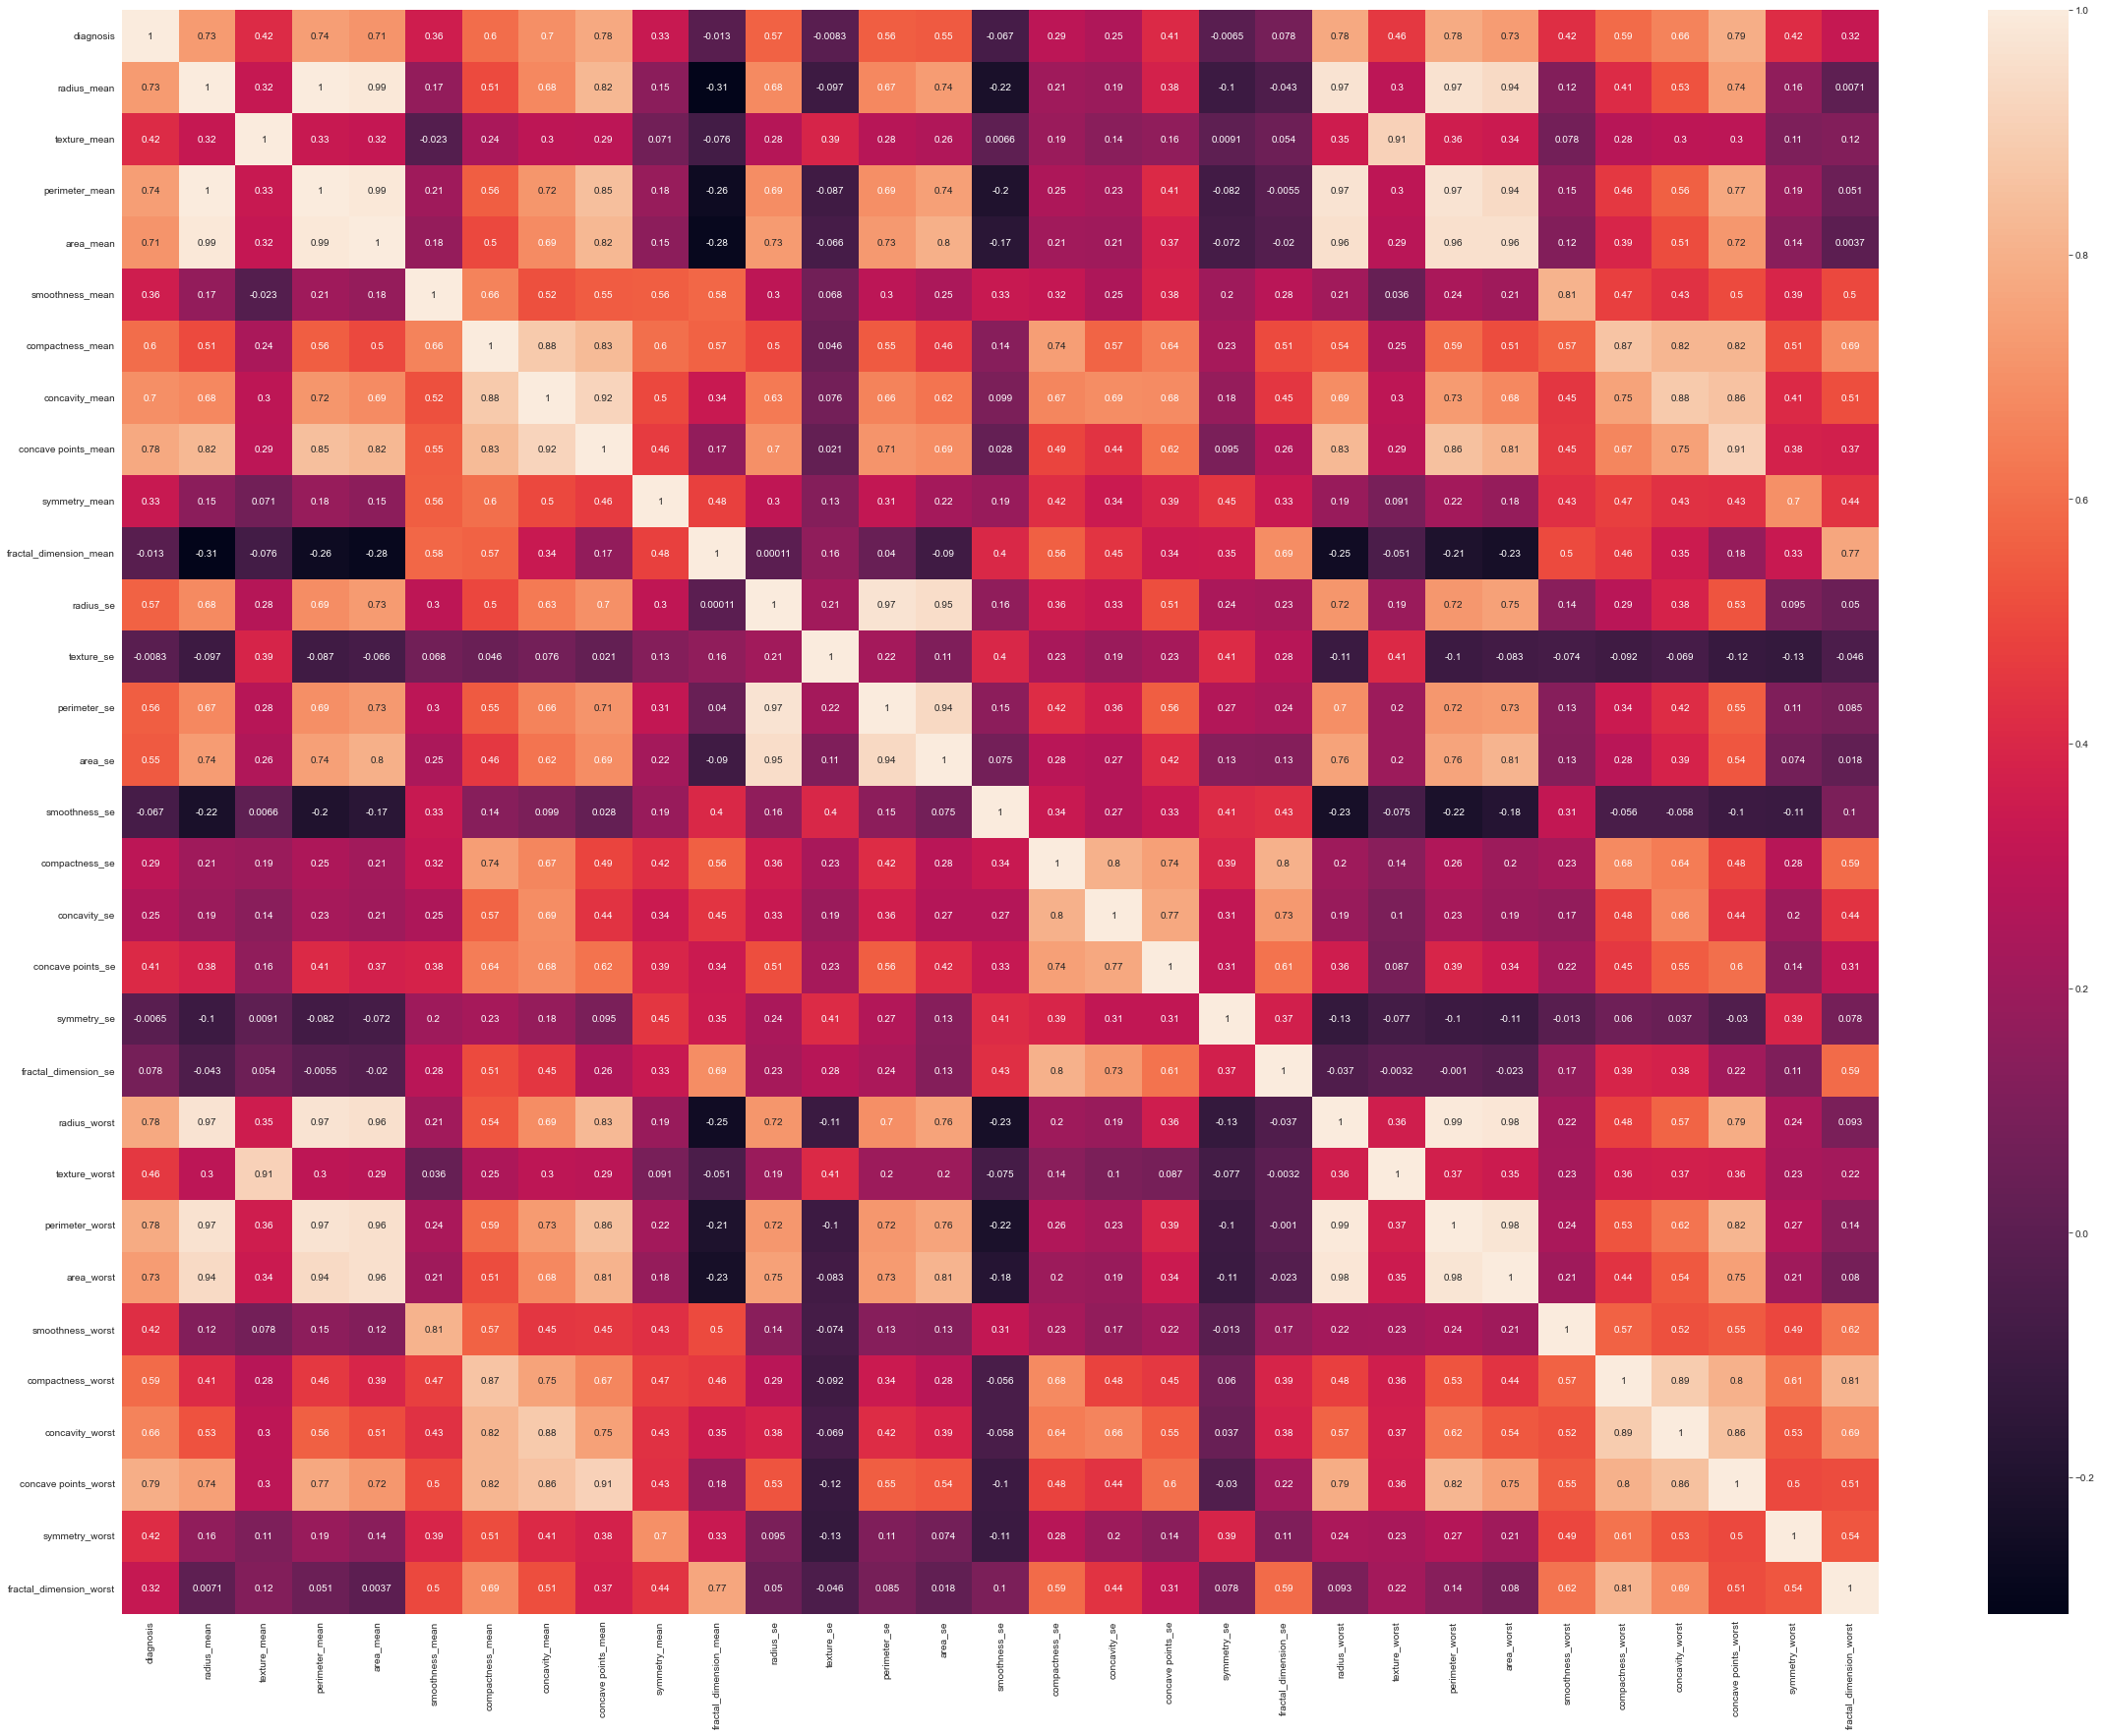

In [31]:
import seaborn as sb
corr = df.corr()
plt.figure(figsize=(40,30))
sb.heatmap(corr,annot=True)

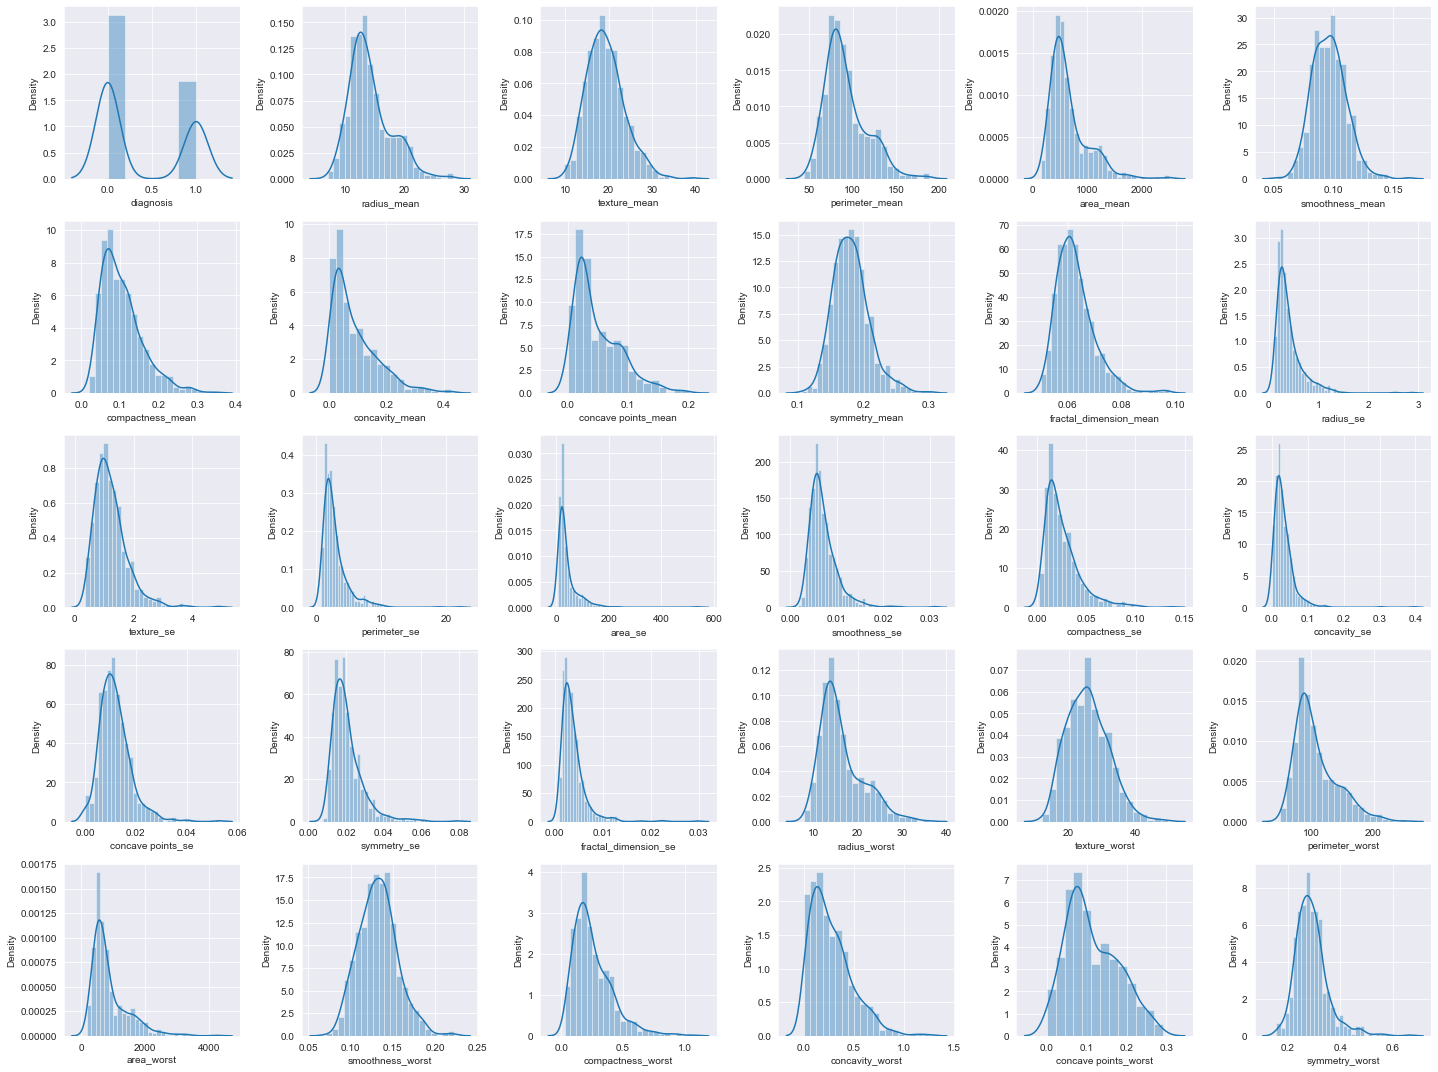

In [32]:
# EDA:-

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

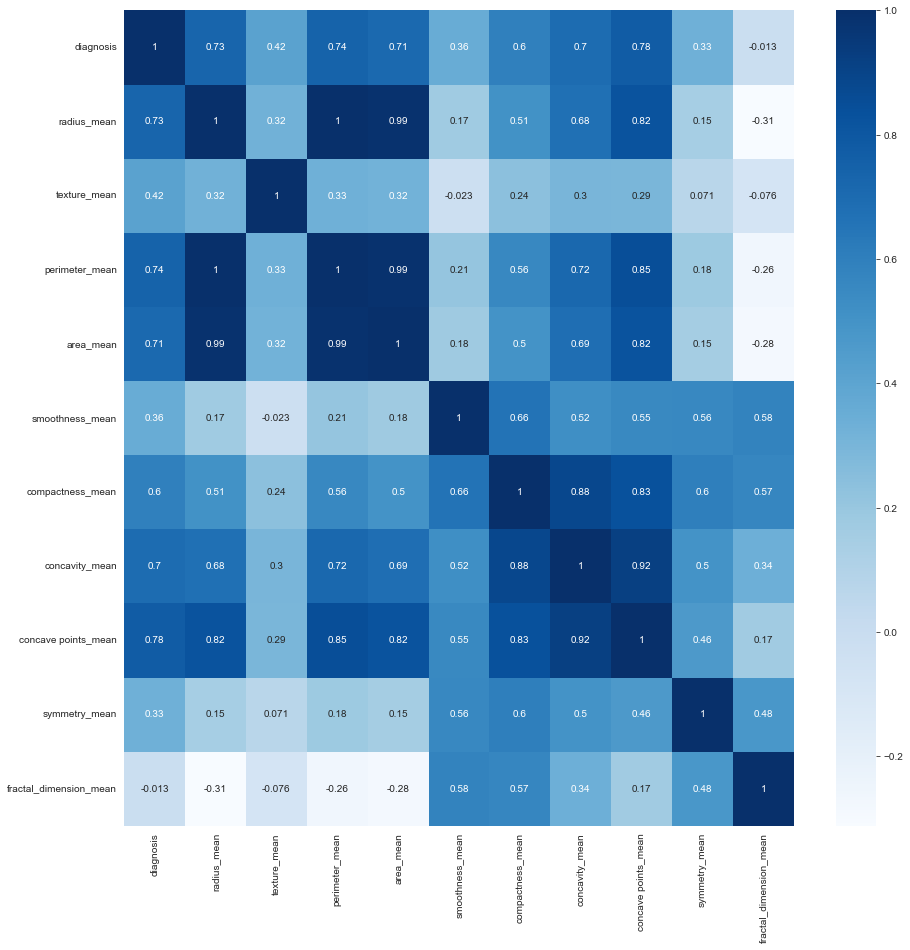

In [35]:
# Heatmap For Mean Columns:-

plt.figure(figsize=(15,15))
sns.heatmap(df[m_col].corr(),annot = True, cmap = 'Blues');

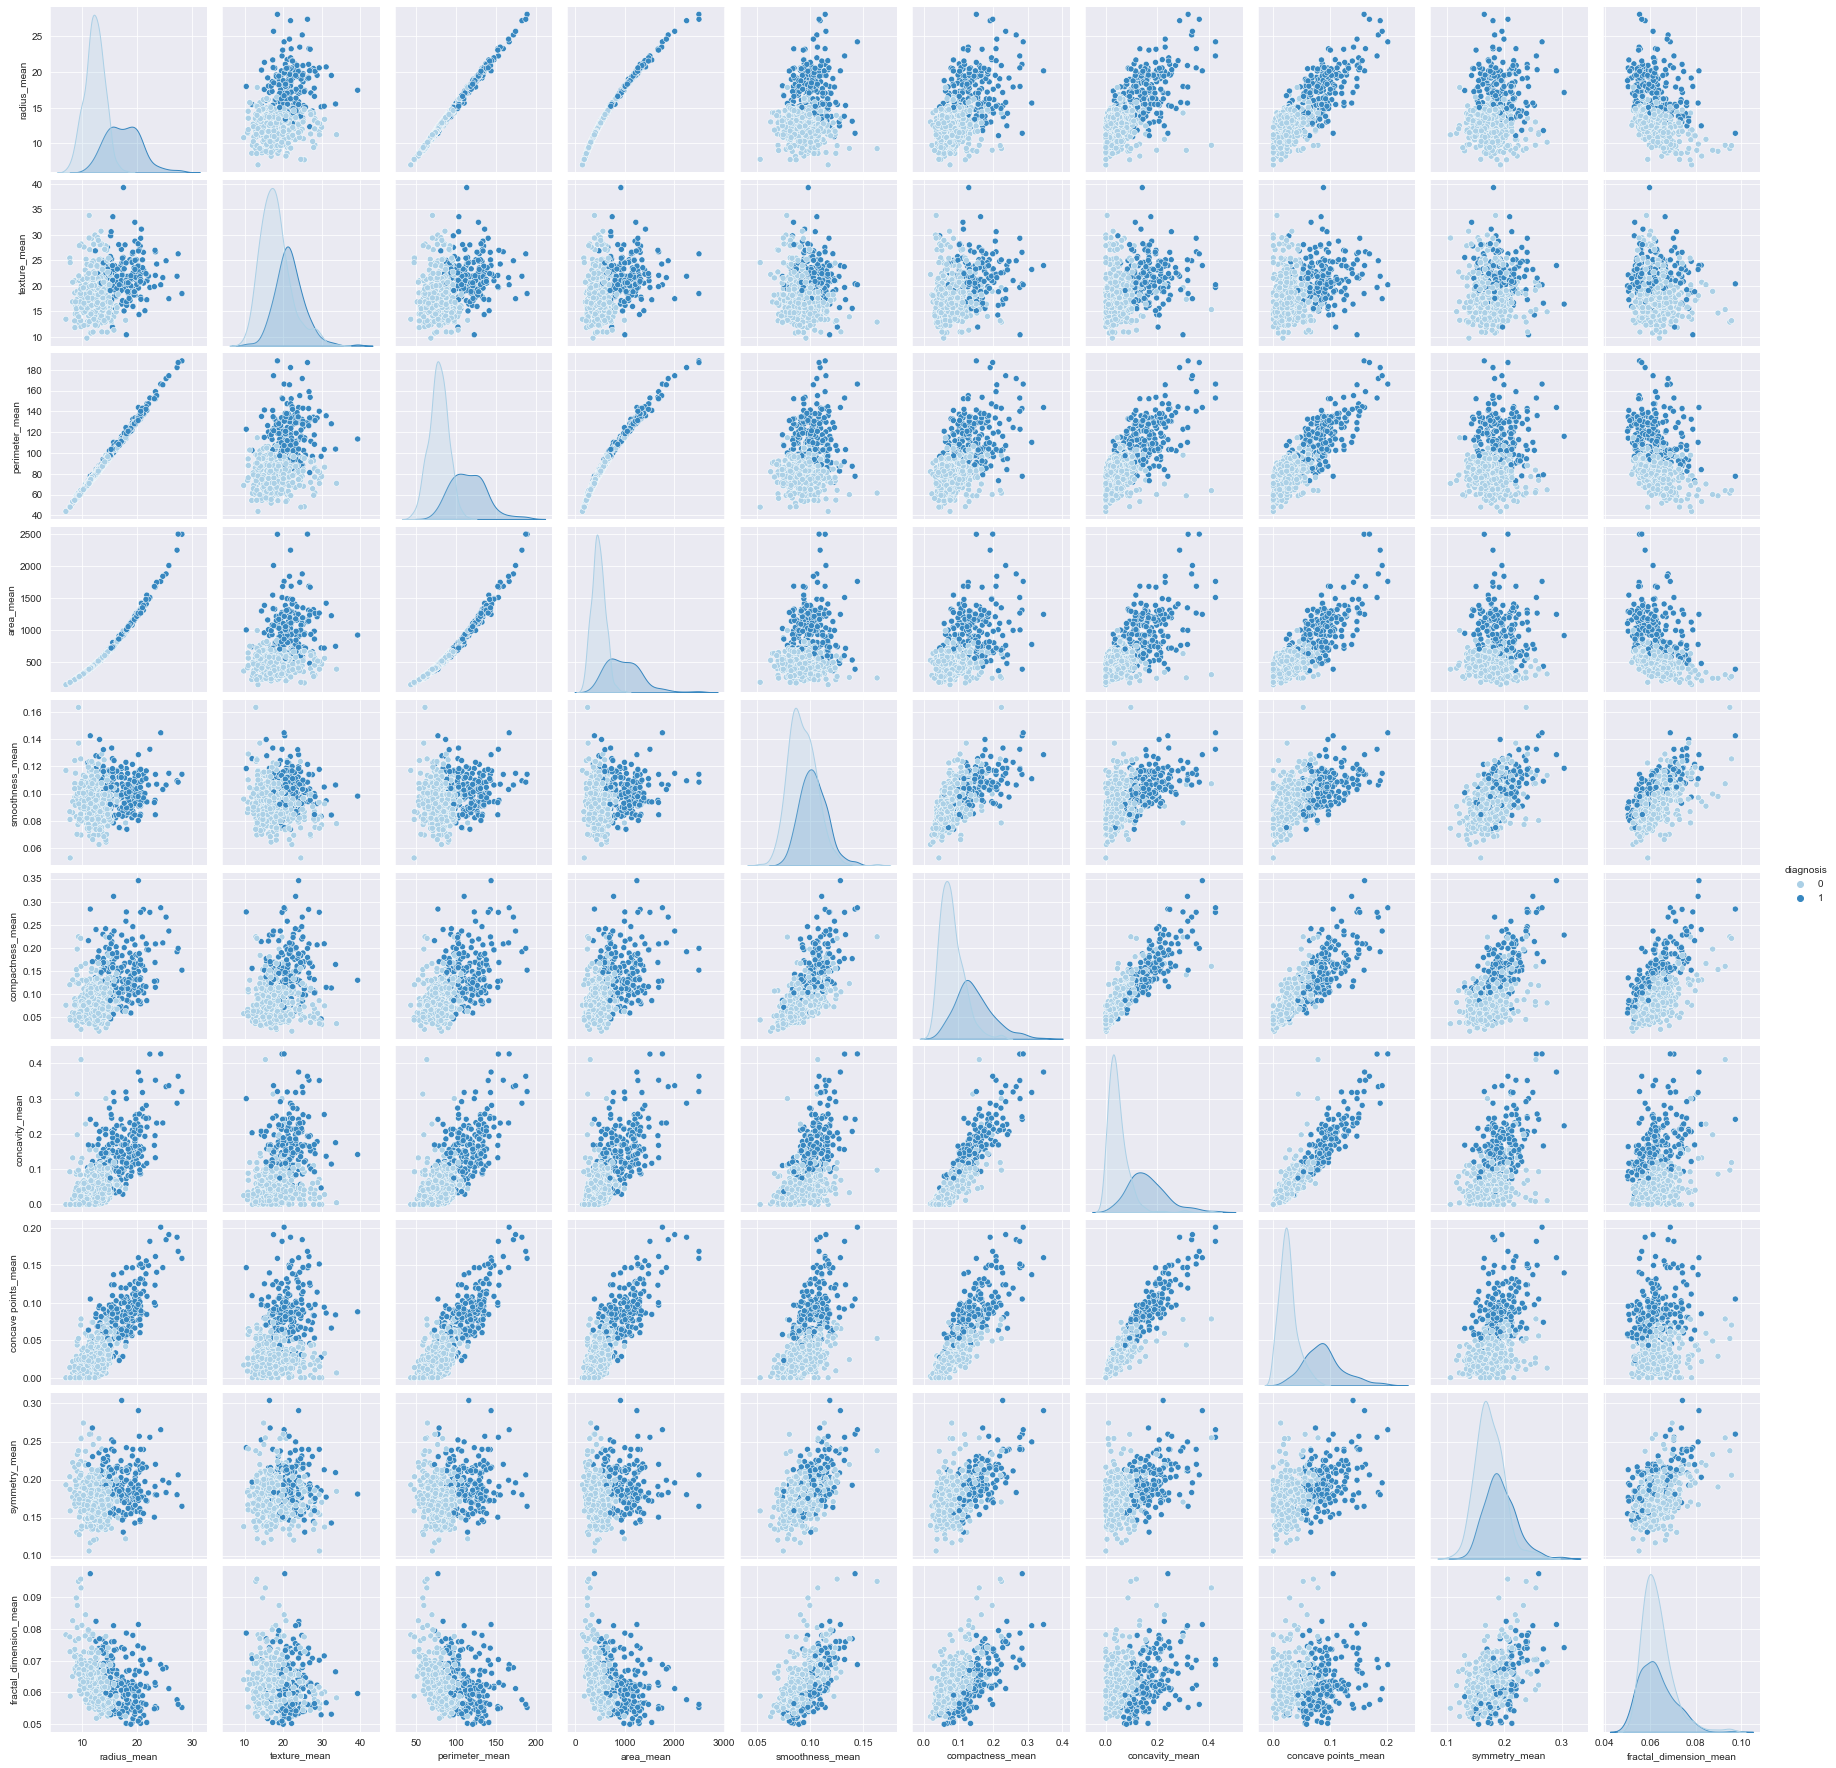

In [36]:
# pairplot for mean columns

sns.pairplot(df[m_col],hue = 'diagnosis', palette='Blues');

In [38]:
# removing highly correlated features

corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df_new = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df_new.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [53]:
df_new = df[['diagnosis', 'concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se',
       'area_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst',
       'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_worst', 'compactness_se', 'concavity_se',
       'fractal_dimension_se']]

In [39]:
X = df_new.drop(['diagnosis'], axis=1).values
y = df_new[['diagnosis']].values

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

In [55]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train_rb = scaler.fit_transform(X_train)
x_test_rb = scaler.fit_transform(X_test)

In [56]:
print(X_train.shape, X_valid.shape, X_test.shape)

(426, 22) (100, 22) (43, 22)


In [57]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_rb, y_train)

GaussianNB()

In [11]:
from sklearn.naive_bayes import BernoulliNB
BNBclf = BernoulliNB()
BNBclf.fit(X, y)

C:\Users\saitu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [59]:
print("Naive Bayes score: ",nb.score(x_test_rb, y_test))

Naive Bayes score:  0.9767441860465116


In [12]:
print("Naive Bayes score: ",BNBclf.score(x_test_rb, y_test))

Naive Bayes score:  0.6744186046511628
